In [1]:
import json
import pandas as pd
import os
import csv
import numpy
import requests
from pprint import pprint
import matplotlib.pyplot as plt

#api_key = "a2rOTe8PfBiJBwTOSlRbteARqAEa0s6DsRyoSOOF"
api_key = 'dhgQf6KtNBkVRiiATJzUl86EZUOwzS5vNehyPfXR'
#api_key = 'Ol8GNoMagr7aPceWCUw11EA95LFeZFd4jMg62VTo'
url = 'https://api.data.gov/ed/collegescorecard/v1/schools.json?'

search = 'school.degrees_awarded.predominant=3&_fields=id,school.name,latest.cost.tuition.in_state,latest.cost.tuition.out_of_state,school.region_id,latest.earnings.10_yrs_after_entry.median,latest.earnings.6_yrs_after_entry.median,latest.repayment.5_yr_repayment.completers_rate,latest.repayment.7_yr_repayment.completers_rate,latest.repayment.3_yr_repayment.completers_rate'

search_url = url + search + '&api_key=' + api_key

response = requests.get(search_url)
response_json = response.json()
# pprint (response.json())


In [2]:
# school_ids_list = []
# schools_list = []
# regions_list = []


# for page in range (0,105):
#     search_url = f'{url}{search}&page={page}&api_key={api_key}'
#     response = requests.get(search_url)
#     response_json = response.json()
       
#     for num in range(0,20):
#         school_id = response_json['results'][num]['id']
#         school_ids_list.append(school_id)
#         school_name = response_json['results'][num]['school.name']
#         schools_list.append(school_name)  
#         region_id = response_json['results'][num]['school.region_id']
#         regions_list.append(region_id)
                
# # print (len(school_ids_list))
# # print (len(schools_list))
# # print (len(regions_list))

# schoolinfo_df = pd.DataFrame({
#     "School ID": school_ids_list,
#     "School": schools_list,
#     "Region ID": regions_list
# })

# schoolinfo_df.to_csv("schoolinfo.csv", index=False, header=False)
# schoolinfo_df                    
            


In [3]:
# school_ids_list = []
# tuition_in_state_list = []
# tuition_out_state_list = []


# for page in range (0,105):
#         search_url = f'{url}{search}&page={page}&api_key={api_key}'
#         response = requests.get(search_url)
#         response_json = response.json()
        
#         for num in range(0,20):
#             school_id = response_json['results'][num]['id']
#             school_ids_list.append(school_id)                
#             tuition_in = response_json['results'][num]['latest.cost.tuition.in_state']
#             tuition_in_state_list.append(tuition_in)  
#             tuition_out = response_json['results'][num]['latest.cost.tuition.out_of_state']
#             tuition_out_state_list.append(tuition_out)
                
# school_tuition_df = pd.DataFrame({
#     "School ID": school_ids_list,
#     "Tuition In of State": tuition_in_state_list,
#     "Tuition Out of State": tuition_out_state_list
# })
                
# school_tuition_df.to_csv("school_tuition.csv", index=False, header=False)
# school_tuition_df                

In [4]:
schoolcsvpath = os.path.join('schoolinfo.csv')
tuitioncsvpath = os.path.join('school_tuition.csv')

school_pd_df = pd.read_csv(schoolcsvpath, encoding="utf-8")
tuition_pd_df = pd.read_csv(tuitioncsvpath, encoding="utf-8")

school_tuition_merge = pd.merge(school_pd_df, tuition_pd_df, on='School Id', how="outer")
school_tuition_merge

,School Id,School Name,Region Id,Tuition In State,Tuition Out of State
0,445188,University of California-Merced,8,13262.0,39944.0
1,446792,Sanford-Brown College-Las Vegas,8,NaN,NaN
2,446808,Sanford-Brown College-Seattle,8,NaN,NaN
3,446048,Ave Maria University,5,19128.0,19128.0
4,446668,The Art Institute of Ohio-Cincinnati,3,NaN,NaN
5,447458,SAE Expression College,8,23899.0,23899.0
6,447272,Argosy University-Los Angeles,8,13152.0,13152.0
7,117557,Lincoln University,8,10575.0,10575.0
8,210492,Bryn Athyn College of the New Church,2,19932.0,19932.0
9,441982,Franklin W Olin College of Engineering,1,49986.0,49986.0


In [5]:
school_ids_list = []
list_earnings_10_yrs_after_entry = []
list_earnings_6_yrs_after_entry = []


for page in range (0,105):
    search_url = f'{url}{search}&page={page}&api_key={api_key}'
    response = requests.get(search_url)
    response_json = response.json()
    for num in range (0,20):
            earnings_10yrs_after = response_json['results'][num]['latest.earnings.10_yrs_after_entry.median']
            earnings_6yrs_after = response_json['results'][num]['latest.earnings.6_yrs_after_entry.median']
            list_earnings_10_yrs_after_entry.append(earnings_10yrs_after)
            list_earnings_6_yrs_after_entry.append(earnings_6yrs_after)

# len(list_earnings_10_yrs_after_entry)
# len(list_earnings_6_yrs_after_entry)

list_3_year_repayment = []
list_5_year_repayment = []
list_7_year_repayment = []


for page in range (0,105):
    search_url = f'{url}{search}&page={page}&api_key={api_key}'
    response = requests.get(search_url)
    response_json = response.json()
    for num in range (0,20):
            school_id = response_json['results'][num]['id']
            repay_3years = response_json['results'][num]['latest.repayment.3_yr_repayment.completers_rate']
            repay_5years = response_json['results'][num]['latest.repayment.5_yr_repayment.completers_rate']
            repay_7years = response_json['results'][num]['latest.repayment.7_yr_repayment.completers_rate']
            school_ids_list.append(school_id)
            list_3_year_repayment.append(repay_3years)
            list_5_year_repayment.append(repay_5years)
            list_7_year_repayment.append(repay_7years)
                                         
earnings_repayment_df = pd.DataFrame({
    "School Id": school_ids_list,
    "Earnings 6 Years After Entry": list_earnings_6_yrs_after_entry,
    "Earnings 10 years After Entry": list_earnings_10_yrs_after_entry,
    "3 Year Repayment Percentage": list_3_year_repayment,
    "5 Year Repayment Percentage": list_5_year_repayment,
    "7 Year Repayment Percentage": list_7_year_repayment,
})
     

In [6]:
earnings_repayment_df.to_csv("earnings_repayment.csv", index=False, header=True)

earningscsvpath = os.path.join('earnings_repayment.csv')
earnings_pd_df = pd.read_csv(earningscsvpath, encoding="utf-8")


cost_earnings_stat_merge = pd.merge(school_tuition_merge, earnings_pd_df, on='School Id', how="outer")
cost_earnings_stat_merge.to_csv("cost_earnings_stat.csv", index=False, header=True)
cost_earnings_stat_merge


,School Id,School Name,Region Id,Tuition In State,Tuition Out of State,Earnings 6 Years After Entry,Earnings 10 years After Entry,3 Year Repayment Percentage,5 Year Repayment Percentage,7 Year Repayment Percentage
0,445188,University of California-Merced,8,13262.0,39944.0,36900.0,NaN,0.781473,0.786070,NaN
1,446792,Sanford-Brown College-Las Vegas,8,NaN,NaN,23500.0,29300.0,0.347468,0.444317,0.516055
2,446808,Sanford-Brown College-Seattle,8,NaN,NaN,23500.0,29300.0,0.347468,0.444317,0.516055
3,446048,Ave Maria University,5,19128.0,19128.0,29800.0,32800.0,0.674847,0.771186,0.711111
4,446668,The Art Institute of Ohio-Cincinnati,3,NaN,NaN,27200.0,34100.0,0.503601,0.603623,0.698751
5,447458,SAE Expression College,8,23899.0,23899.0,32100.0,48400.0,0.569519,0.609312,0.691803
6,447272,Argosy University-Los Angeles,8,13152.0,13152.0,30300.0,41400.0,0.476571,0.639640,0.761628
7,117557,Lincoln University,8,10575.0,10575.0,NaN,NaN,NaN,NaN,NaN
8,210492,Bryn Athyn College of the New Church,2,19932.0,19932.0,NaN,NaN,NaN,NaN,NaN
9,441982,Franklin W Olin College of Engineering,1,49986.0,49986.0,NaN,NaN,NaN,NaN,NaN


In [7]:
count_NaN_tution = cost_earnings_stat_merge[(cost_earnings_stat_merge == "NaN")]
len(count_NaN_tution)

2100

In [8]:
updated_df = cost_earnings_stat_merge.dropna()
df_reset = updated_df.reset_index()
df_reset

,index,School Id,School Name,Region Id,Tuition In State,Tuition Out of State,Earnings 6 Years After Entry,Earnings 10 years After Entry,3 Year Repayment Percentage,5 Year Repayment Percentage,7 Year Repayment Percentage
0,3,446048,Ave Maria University,5,19128.0,19128.0,29800.0,32800.0,0.674847,0.771186,0.711111
1,5,447458,SAE Expression College,8,23899.0,23899.0,32100.0,48400.0,0.569519,0.609312,0.691803
2,6,447272,Argosy University-Los Angeles,8,13152.0,13152.0,30300.0,41400.0,0.476571,0.639640,0.761628
3,10,456348,Argosy University-Phoenix Online Division,6,18244.0,18244.0,30300.0,41400.0,0.476571,0.639640,0.761628
4,11,459842,Herzing University-Kenosha,3,13390.0,13390.0,27900.0,37800.0,0.423355,0.529330,0.688633
5,13,449038,Strayer University-Florida,5,12975.0,12975.0,33100.0,45900.0,0.409350,0.529604,0.600982
6,14,450298,Strayer University-Delaware,2,12975.0,12975.0,33100.0,45900.0,0.409350,0.529604,0.600982
7,15,453215,Strayer University-New Jersey,2,12975.0,12975.0,33100.0,45900.0,0.409350,0.529604,0.600982
8,16,458885,Strayer University-Arkansas,5,12975.0,12975.0,33100.0,45900.0,0.409350,0.529604,0.600982
9,17,458955,Strayer University-Mississippi,5,12975.0,12975.0,33100.0,45900.0,0.409350,0.529604,0.600982


MIN, MEDIAN, MAX BINNING

In [9]:
#list containing 'bins' for tuition
tuition_bins = []
#bin_names are given after tuition is binned i.e (1) tuition is $3503 therefore we label as "least_expensive"
#the bin_names are up for change
bin_names = ["<3503", ">3503"]

#list reference for obtaining min, median, and max tution
tuition_list = df_reset['Tuition In State']

#obtain min value, after that append to list
smallest_tuition = min(tuition_list)
tuition_bins.append(smallest_tuition)

#obtain mid value, after append to list
middle_tution = df_reset['Tuition In State'].median()
tuition_bins.append(middle_tution)

#obtain max value, after append to list
max_tuition = max(tuition_list)
tuition_bins.append(max_tuition)

#print bins list
tuition_bins

#BECAUSE WE ARE ONLY BINNING MIN, MEDIAN, AND MAX (3 FACTORS) WE CAN ONLY ATTRIBUTE (2) LABEL NAMES. THIS MAKES LABELING
#RANGES TOO LARGE. I CONCLUDED TO USE (4) FACTORS: QUARTERILY PERCENTILE SO WE CAN HAVE 3 LABELS. 
#TLDR: pd.cut() only allows bin_labels to be [len(bins) - 1]; this limits our labeling which also limits our filtering

[3503.0, 17682.0, 55056.0]

In [10]:
#apply binning technique and place label names
binned_df = df_reset
binned_df["Affordability"] = pd.cut(binned_df["Tuition In State"], tuition_bins, labels=bin_names)

binned_df

,index,School Id,School Name,Region Id,Tuition In State,Tuition Out of State,Earnings 6 Years After Entry,Earnings 10 years After Entry,3 Year Repayment Percentage,5 Year Repayment Percentage,7 Year Repayment Percentage,Affordability
0,3,446048,Ave Maria University,5,19128.0,19128.0,29800.0,32800.0,0.674847,0.771186,0.711111,>3503
1,5,447458,SAE Expression College,8,23899.0,23899.0,32100.0,48400.0,0.569519,0.609312,0.691803,>3503
2,6,447272,Argosy University-Los Angeles,8,13152.0,13152.0,30300.0,41400.0,0.476571,0.639640,0.761628,<3503
3,10,456348,Argosy University-Phoenix Online Division,6,18244.0,18244.0,30300.0,41400.0,0.476571,0.639640,0.761628,>3503
4,11,459842,Herzing University-Kenosha,3,13390.0,13390.0,27900.0,37800.0,0.423355,0.529330,0.688633,<3503
5,13,449038,Strayer University-Florida,5,12975.0,12975.0,33100.0,45900.0,0.409350,0.529604,0.600982,<3503
6,14,450298,Strayer University-Delaware,2,12975.0,12975.0,33100.0,45900.0,0.409350,0.529604,0.600982,<3503
7,15,453215,Strayer University-New Jersey,2,12975.0,12975.0,33100.0,45900.0,0.409350,0.529604,0.600982,<3503
8,16,458885,Strayer University-Arkansas,5,12975.0,12975.0,33100.0,45900.0,0.409350,0.529604,0.600982,<3503
9,17,458955,Strayer University-Mississippi,5,12975.0,12975.0,33100.0,45900.0,0.409350,0.529604,0.600982,<3503


In [14]:
school_id = binned_df['School Name']
new_dataframe = pd.DataFrame()
new_dataframe.append(school_id)

,0,1,2,3,4,5,6,7,8,9,...,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537
School Name,Ave Maria University,SAE Expression College,Argosy University-Los Angeles,Argosy University-Phoenix Online Division,Herzing University-Kenosha,Strayer University-Florida,Strayer University-Delaware,Strayer University-New Jersey,Strayer University-Arkansas,Strayer University-Mississippi,...,Drexel University,Immaculata University,Franklin and Marshall College,Gannon University,Lebanon Valley College,Pennsylvania State University-Penn State Brand...,Mercyhurst University,Cairn University-Langhorne,Millersville University of Pennsylvania,Villanova University


QUARTILE BINNING

In [13]:
#list containing 'bins' for tuition
quartile_bins = []
#bin_names are given after tuition is binned i.e (1) tuition is $3503 therefore we label as "least_expensive"
#the bin_names are up for change
bin_names = ["<9776.5","9776.5-17682.0","17682.0-31567.5"]

#list reference for obtaining min, median, and max tution
tuition_list = df_reset['Tuition In State']

#obtain 25th percentile, then append to list
twentyfive_Percentile = tuition_list.quantile(0.25)
quartile_bins.append(twentyfive_Percentile)

#obtain 50th percentile, then append to list
fifty_Percentile = tuition_list.quantile(0.50)
quartile_bins.append(fifty_Percentile)

#obtain 75th percentile, then append to list
seventyFive_Percentile = tuition_list.quantile(0.75)
quartile_bins.append(seventyFive_Percentile)

#obtain 99th percentile, then append to list
ninetyNine_Percentile = tuition_list.quantile(1.00)
quartile_bins.append(ninetyNine_Percentile)

#print bins list
quartile_bins

[9776.5, 17682.0, 31567.5, 55056.0]

In [1]:
#apply binning technique and place label names
quartile_df = df_reset
quartile_df["Affordability"] = pd.cut(quartile_df["Tuition In State"], quartile_bins, labels=bin_names)
quartile_df["Affordable"] = ""
quartile_df

NameError: name 'df_reset' is not defined

In [ ]:
#apply another pd.cut to change tution ranges(i.e. 9776.5-17682.0 to "[insert some description word]")
# "[description word]" is up for change. open to suggestions
bin_names = ["<9776.5","9776.5-17682.0","17682.0-31567.5"]

for num in range(0,1537):
    for googah in range(0,2):
        if quartile_df["Affordability"][num] == bin_names[googah]:
            quartile_df['Affordable'][num].append("Lest expensive")
  
            quartile_df


In [2]:
quartile_df["Affordability"][0]

NameError: name 'quartile_df' is not defined

U.S. Service Schools
New England (CT, ME, MA, NH, RI, VT)
Mid East (DE, DC, MD, NJ, NY, PA)
Great Lakes (IL, IN, MI, OH, WI)
Plains (IA, KS, MN, MO, NE, ND, SD)
Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)
Southwest (AZ, NM, OK, TX)
Rocky Mountains (CO, ID, MT, UT, WY)
Far West (AK, CA, HI, NV, OR, WA)
Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)
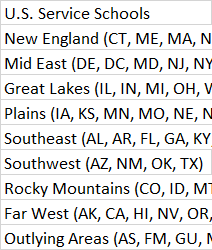

In [15]:
df_mean = df_reset.groupby('Region Id').mean()
df_mean
cleaned_df_mean = df_mean.drop(['index','School Id'],axis=1)
cleaned_df_mean

,Tuition In State,Tuition Out of State,Earnings 6 Years After Entry,Earnings 10 years After Entry,3 Year Repayment Percentage,5 Year Repayment Percentage,7 Year Repayment Percentage
Region Id,,,,,,,
1,29112.816667,32776.183333,39475.000000,49554.166667,0.790872,0.839508,0.867417
2,26001.058608,29223.135531,37945.054945,48754.945055,0.739615,0.793213,0.828465
3,23448.936441,26742.444915,35246.186441,43145.338983,0.716357,0.779455,0.818114
4,20803.045161,23060.251613,35602.580645,42301.935484,0.761357,0.818104,0.844360
5,18366.325000,22730.782500,31787.000000,39603.750000,0.621347,0.691474,0.735573
6,16773.288889,21270.088889,34261.481481,41785.185185,0.644242,0.719577,0.762020
7,13179.042553,20291.914894,33821.276596,42572.340426,0.692003,0.764552,0.815170
8,23430.098684,28459.407895,36998.026316,47139.473684,0.698145,0.766504,0.814428
9,5910.650000,6726.500000,17500.000000,21735.000000,0.508256,0.548189,0.555709


Put Plotting Code below here ~

In [8]:
in_state_tuition = cost_earnings_stat_merge['Tuition In State'].fillna(0)
out_state_tuition = cost_earnings_stat_merge['Tuition Out of State'].fillna(0)
#type(out_state_tuition)

define best school = schools that are above average (T_E ration = tution/earnings)






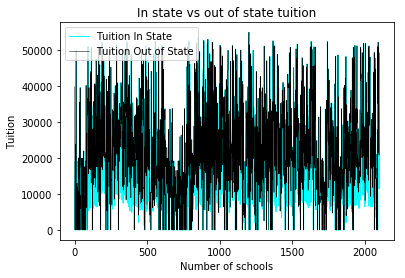

In [9]:
#In state tution is significantly cheaper than out of state tution
plt.plot(in_state_tuition,'cyan', linewidth=1, markersize=1)
plt.plot(out_state_tuition,'black',linewidth=0.5, markersize=1)
plt.title("In state vs out of state tuition")
plt.xlabel("Number of schools")
plt.ylabel('Tuition')
plt.legend()